# Project 1

Jerome's question: How does relationship status affect social media use?

In [56]:
# Code goes here
from pathlib import Path
import pandas as pd

In [57]:
df = pd.read_csv(Path('./Resources/smmh.csv'))
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [58]:
df = df.rename(columns={
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'organization',
    '6. Do you use social media?': 'is_social_media_user',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_on_social_media',
    '9. How often do you find yourself using Social media without a specific purpose?': 'freq_on_social_media',
    '10. How often do you get distracted by Social media when you are busy doing something?':'freq_distracted',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'restless_if_not_used',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worried',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feel_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seek_validation',
    '18. How often do you feel depressed or down?': 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'fluctuating_interest',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues'
})

In [ ]:
# How many people were surveyed from each sub-group


In [59]:
time_on_social_media_df = df[['relationship_status', 'avg_time_on_social_media']]
time_on_social_media_df['avg_time_on_social_media'].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [60]:
def get_avg_time(avg_time):
    match avg_time:
        case 'Less than an Hour':
            return 0.5
        case 'Between 1 and 2 hours':
            return 1.5
        case 'Between 2 and 3 hours':
            return 2.5
        case 'Between 3 and 4 hours':
            return 3.5
        case 'Between 4 and 5 hours':
            return 4.5
        case 'More than 5 hours':
            return 5.5
        case _:
            return 0

In [61]:
time_on_social_media_df.loc[:, 'avg_time_on_social_media'] = time_on_social_media_df.loc[:, 'avg_time_on_social_media'].apply(get_avg_time)
time_on_social_media_df = time_on_social_media_df.groupby('relationship_status').mean()
time_on_social_media_df = time_on_social_media_df.rename(columns={
    'relationship_status': 'Relationship Status',
    'avg_time_on_social_media': 'Average Time on Social Media'
})


<Axes: title={'center': 'Average Time on Social Media'}, xlabel='Average Hours on Social Media Per Day'>

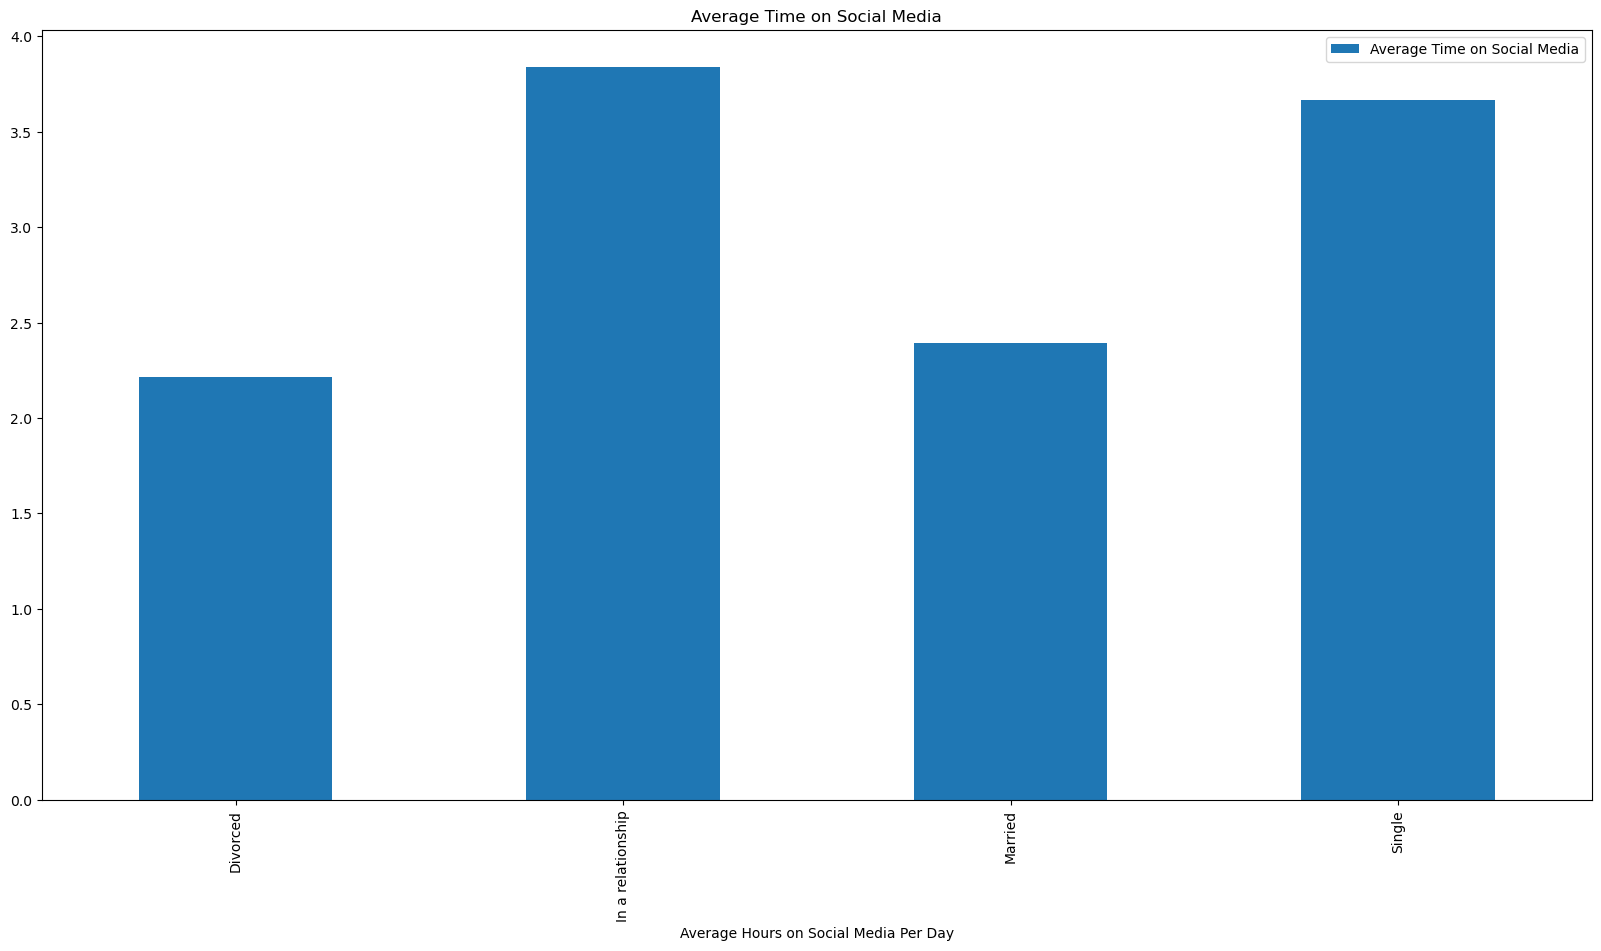

In [62]:
time_on_social_media_df.plot(
    title="Average Time on Social Media",
    kind="bar",
    xlabel="Average Hours on Social Media Per Day",
    figsize=[20, 10])

<Axes: xlabel='On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?'>

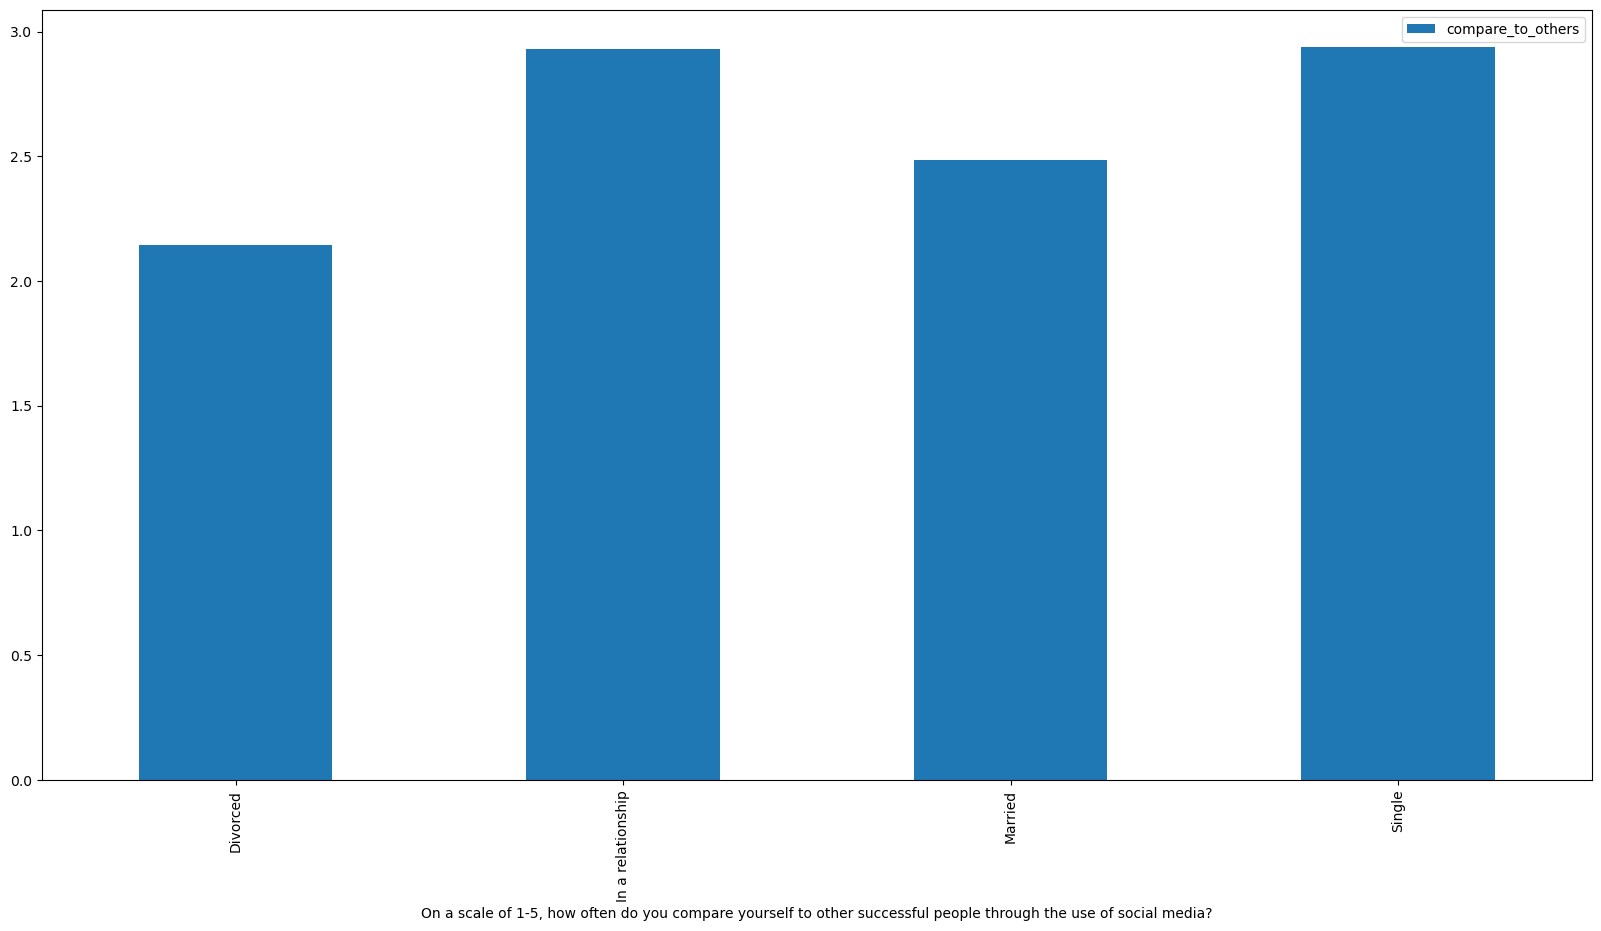

In [63]:
df[['relationship_status', 'compare_to_others']].groupby('relationship_status').mean().plot(
    kind="bar",
    figsize=[20, 10],
    xlabel="On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?"
)

<Axes: xlabel='On a scale of 1 to 5, how much are you bothered by worries?'>

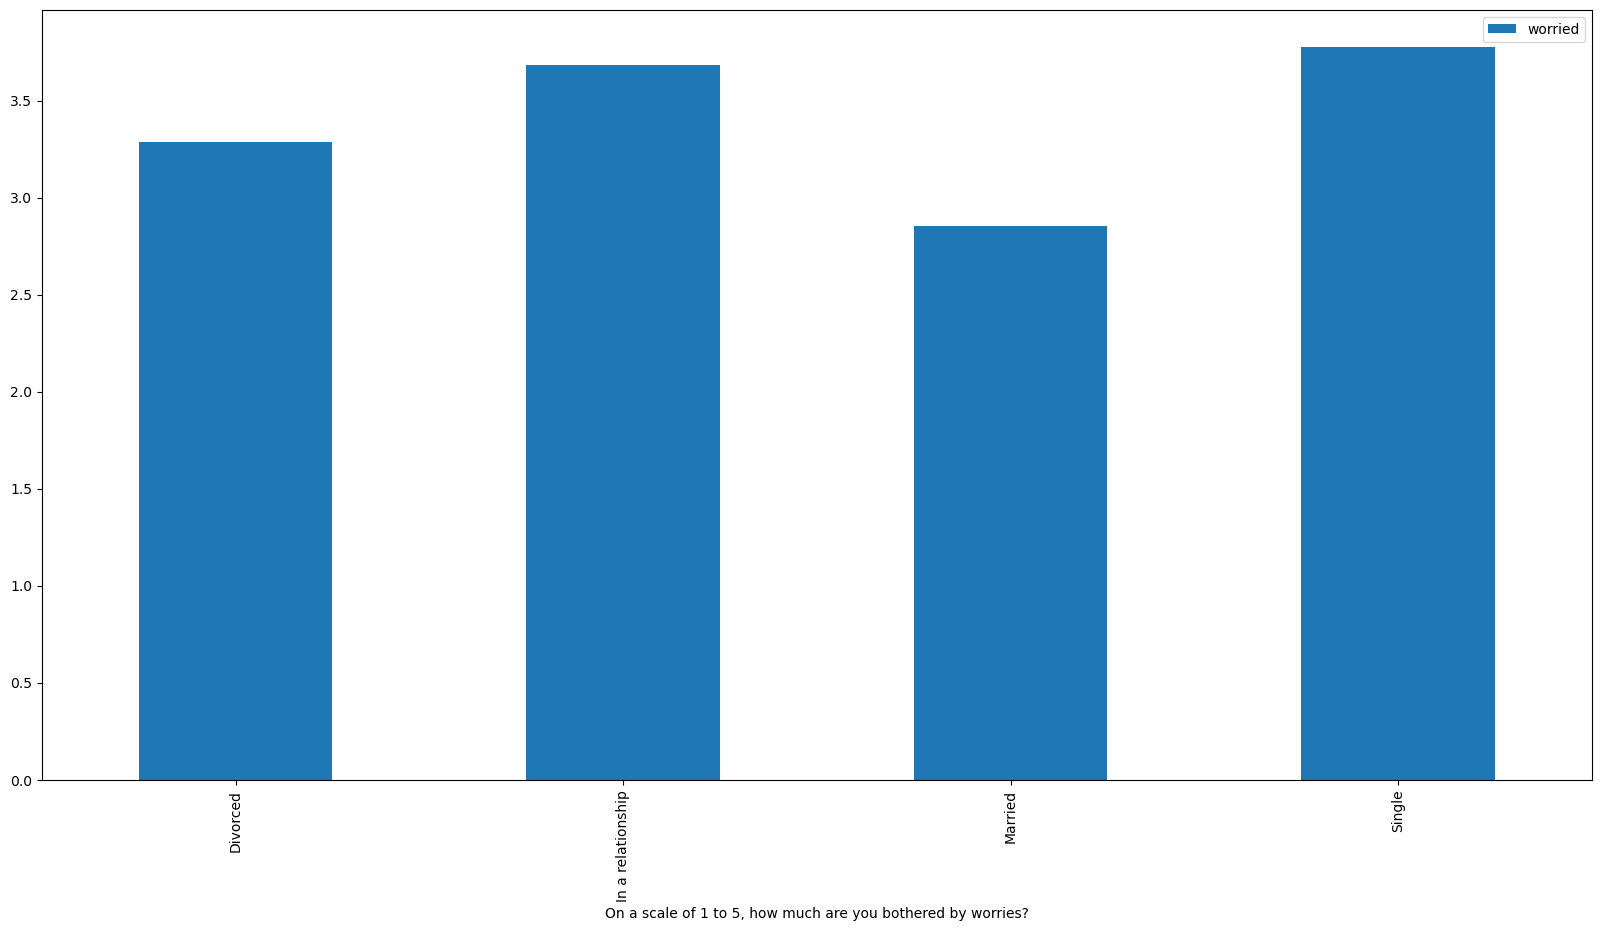

In [64]:
df[['relationship_status', 'worried']].groupby('relationship_status').mean().plot(
    kind="bar",
    figsize=[20, 10],
    xlabel="On a scale of 1 to 5, how much are you bothered by worries?"
)

<Axes: xlabel='How often do you look to seek validation from features of social media?'>

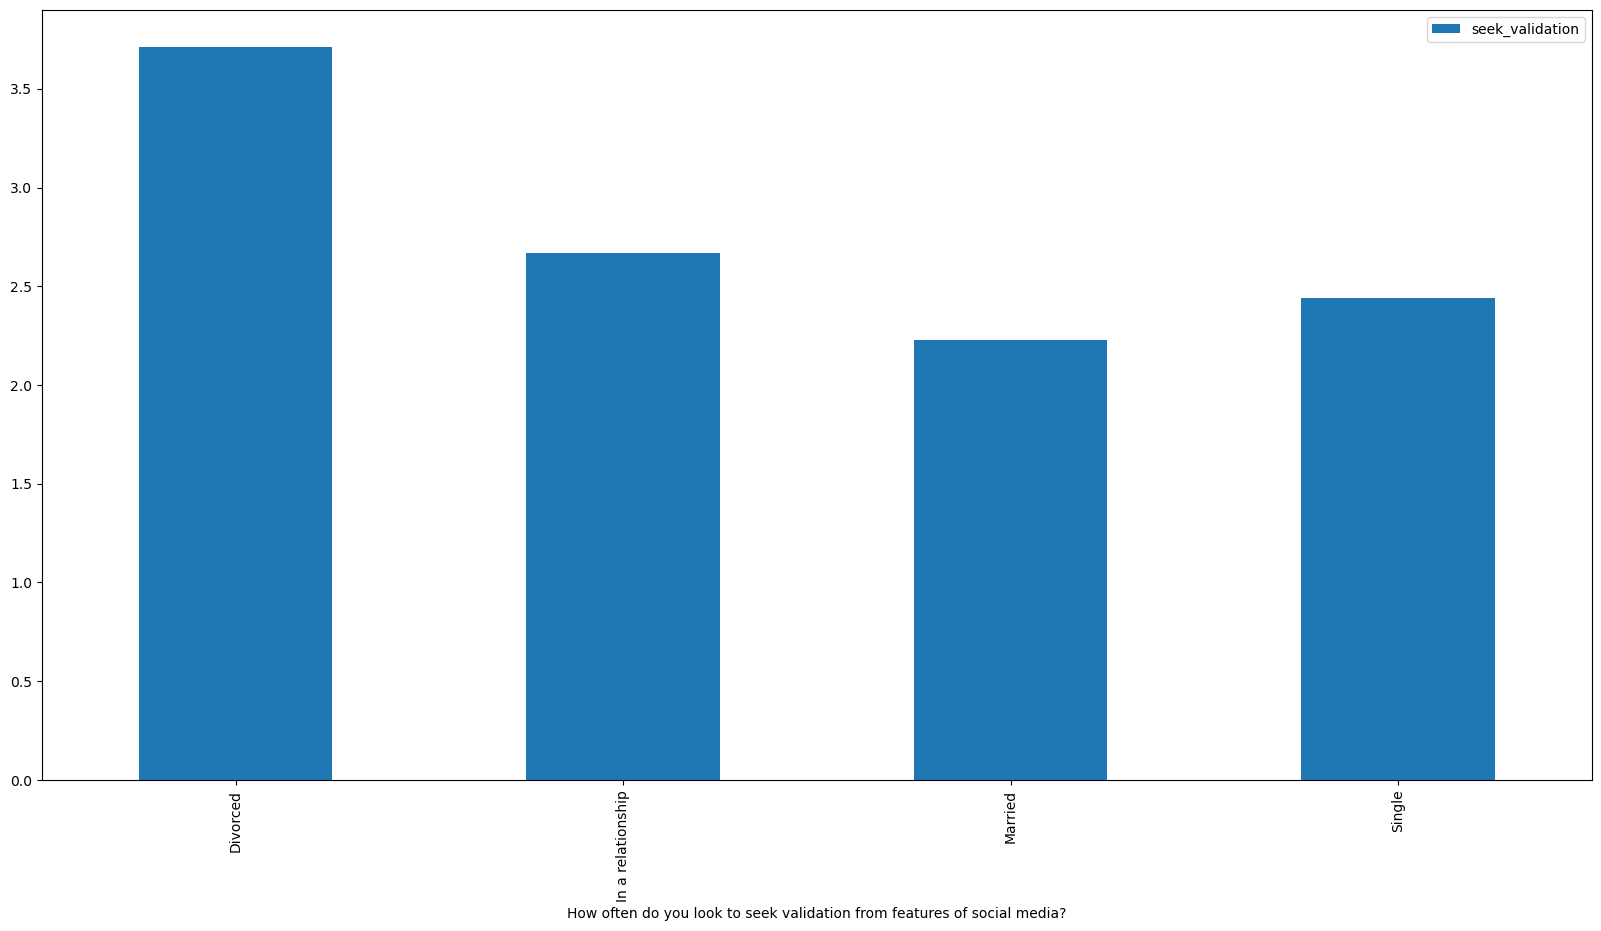

In [65]:
df[['relationship_status', 'seek_validation']].groupby('relationship_status').mean().plot(
    kind="bar",
    figsize=[20, 10],
    xlabel="How often do you look to seek validation from features of social media?"
)